In [56]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

In [57]:
df_data = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United Kingdom")].copy()
df_data["job_posted_month"] = df_data["job_posted_date"].dt.strftime("%B")

In [58]:
df_data_pivot = df_data.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
df_data_pivot.reset_index(inplace=True)

In [59]:
df_data_pivot["month_no"] = pd.to_datetime(df_data_pivot["job_posted_month"], format="%B").dt.month
df_data_pivot.sort_values(by="month_no", ascending=True, inplace=True)
df_data_pivot.set_index("job_posted_month", inplace=True)
df_data_pivot.drop(columns="month_no", inplace=True)

In [60]:
df_data_pivot

job_title_short,Data Analyst
job_posted_month,
January,1467
February,1051
March,712
April,561
May,614
June,736
July,892
August,610
September,1112


In [61]:
df_datas = df[(df["job_title_short"] == "Senior Data Analyst") & (df["job_country"] == "United Kingdom")].copy()
df_datas["job_posted_month"] = df_datas["job_posted_date"].dt.strftime("%B")
df_datas_pivot = df_datas.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
df_datas_pivot.reset_index(inplace=True)
df_datas_pivot["month_no"] = pd.to_datetime(df_datas_pivot["job_posted_month"], format="%B").dt.month
df_datas_pivot.sort_values(by="month_no", ascending=True, inplace=True)
df_datas_pivot.set_index("job_posted_month", inplace=True)
df_datas_pivot.drop(columns="month_no", inplace=True)


In [62]:
df_datas_pivot

job_title_short,Senior Data Analyst
job_posted_month,
January,169
February,140
March,91
April,63
May,60
June,102
July,116
August,96
September,139


In [63]:
df_data_pivot

job_title_short,Data Analyst
job_posted_month,
January,1467
February,1051
March,712
April,561
May,614
June,736
July,892
August,610
September,1112


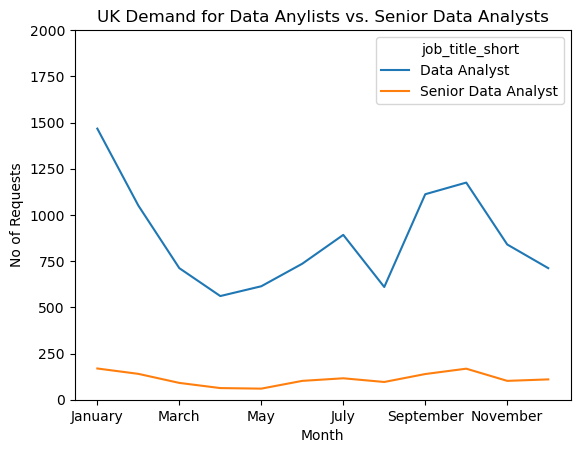

In [67]:
df_data_merged = df_data_pivot.merge(df_datas_pivot, on = "job_posted_month")
df_data_merged.plot(kind="line")
plt.title("UK Demand for Data Anylists vs. Senior Data Analysts")
plt.ylim(0,2000)
plt.ylabel("No of Requests")
plt.xlabel("Month")
plt.show()